In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Train set

In [4]:
def make_df(directory):
    df = pd.read_csv(directory)
    df = pd.DataFrame(df)
    return df

In [5]:
pd.set_option('display.max_rows', 4)

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train = pd.DataFrame(train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [6]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df_train.shape

(1460, 81)

In [8]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
df_train_col = df_train.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage'])
df_train_filt = df_train_col.dropna(axis=0)

nan_counts = df_train_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [10]:
df_train_filt.shape

(1338, 75)

In [11]:
X = df_train_filt.copy()
y = X["SalePrice"]
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [12]:
X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125
1459,1460,20,0,9937,0,0,0,0,0,0,...,0,0,0,0,0,6,2008,0,0,147500


In [13]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

binfo_gen = mutual_info_regression(X, y)

In [14]:
binfo = binfo_gen

In [15]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.24069229855205387
Feature: MSZoning, MI: 0.133419206773701
Feature: LotArea, MI: 0.15914491046878343
Feature: Street, MI: 0.0
Feature: LotShape, MI: 0.09996958085912167
Feature: LandContour, MI: 0.0346403500556034
Feature: Utilities, MI: 0.0031750828060581604
Feature: LotConfig, MI: 0.011366717959202521
Feature: LandSlope, MI: 0.0
Feature: Neighborhood, MI: 0.48691676886030466
Feature: Condition1, MI: 0.02318910835836152
Feature: Condition2, MI: 0.012619394221841107
Feature: BldgType, MI: 0.02217165927374687
Feature: HouseStyle, MI: 0.06878954884706534
Feature: OverallQual, MI: 0.5346187343940665
Feature: OverallCond, MI: 0.11394963873447761
Feature: YearBuilt, MI: 0.36201213199952775
Feature: YearRemodAdd, MI: 0.24966069677476765
Feature: RoofStyle, MI: 0.03000987374967523
Feature: RoofMatl, MI: 0.003380766534241353
Feature: Exterior1st, MI: 0.12765428552970937
Feature: Exterior2nd, MI: 0.16715390277296338
Feature: MasVnrType, MI: 0.0984

In [16]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [17]:
binfo_df

,MI,Features
0,0.000000,Id
1,0.240692,MSSubClass
2,0.133419,MSZoning
...,...,...
72,0.090871,SaleType
73,0.092211,SaleCondition
74,5.506305,SalePrice


In [18]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
74,5.506305,SalePrice
15,0.534619,OverallQual
10,0.486917,Neighborhood
...,...,...
9,0.000000,LandSlope
4,0.000000,Street
37,0.000000,Heating


In [19]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

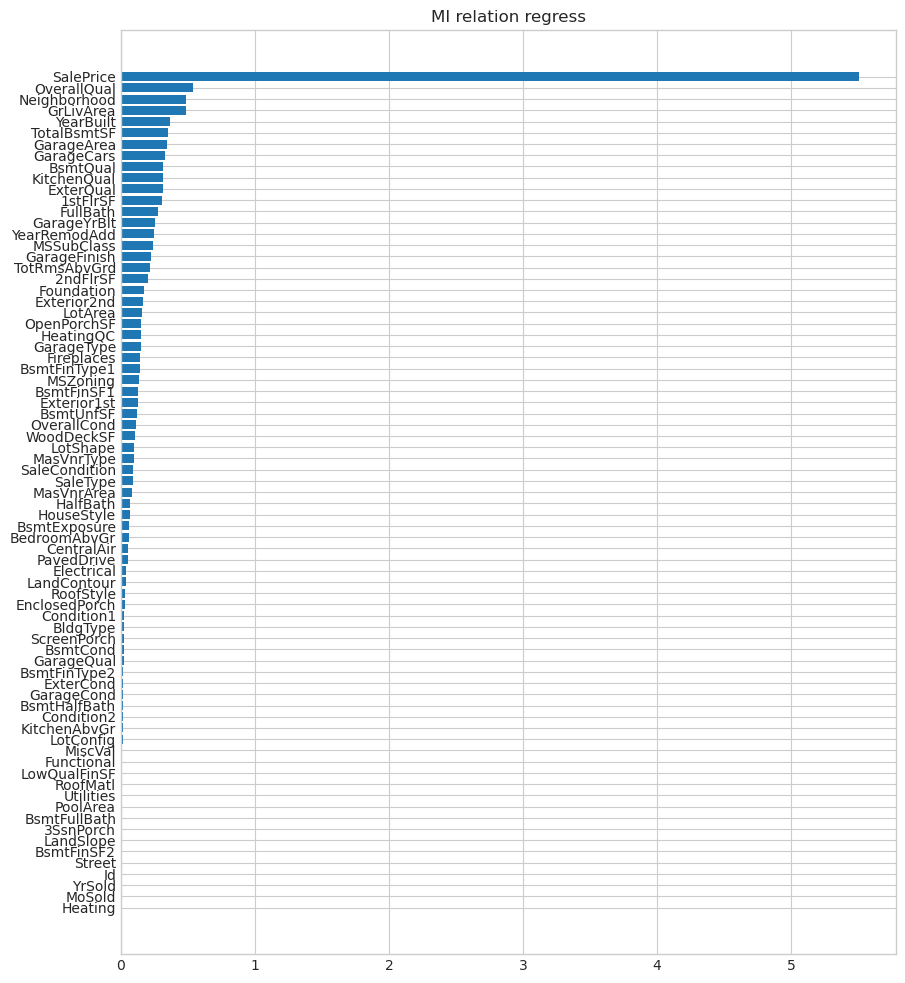

In [20]:
plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_df, 'MI', 'Features', "MI relation regress")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


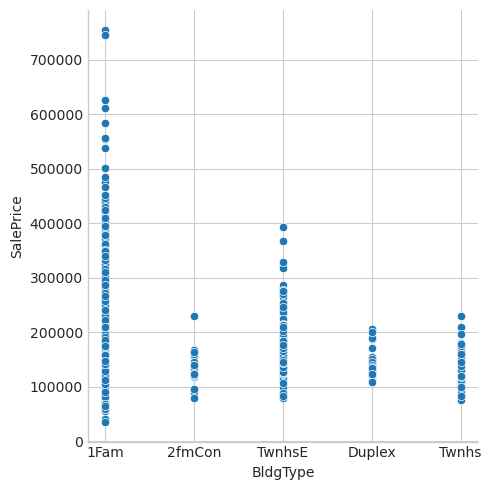

In [21]:
sns.relplot(x='BldgType', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


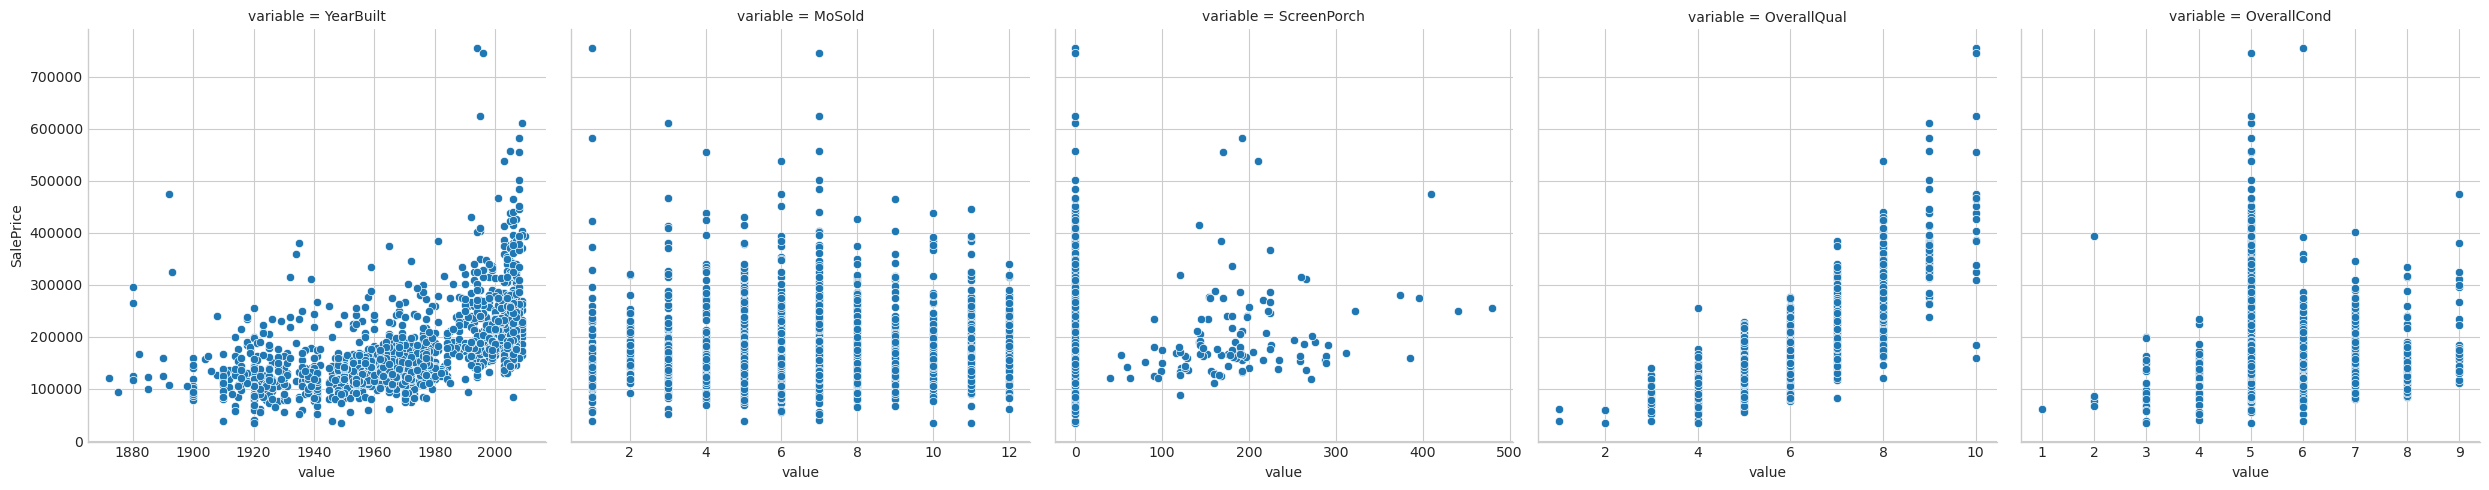

In [22]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [23]:
from sklearn.preprocessing import LabelEncoder

def corre_heatmap(df):
    encoder = LabelEncoder()
    
    df_category = df.select_dtypes(include=['object']).columns
    
    
    
    for column in df_category:
        df[column] = encoder.fit_transform(df[column])
    
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

In [24]:
pd.set_option("display.max_columns", None)

X.shape

(1338, 75)

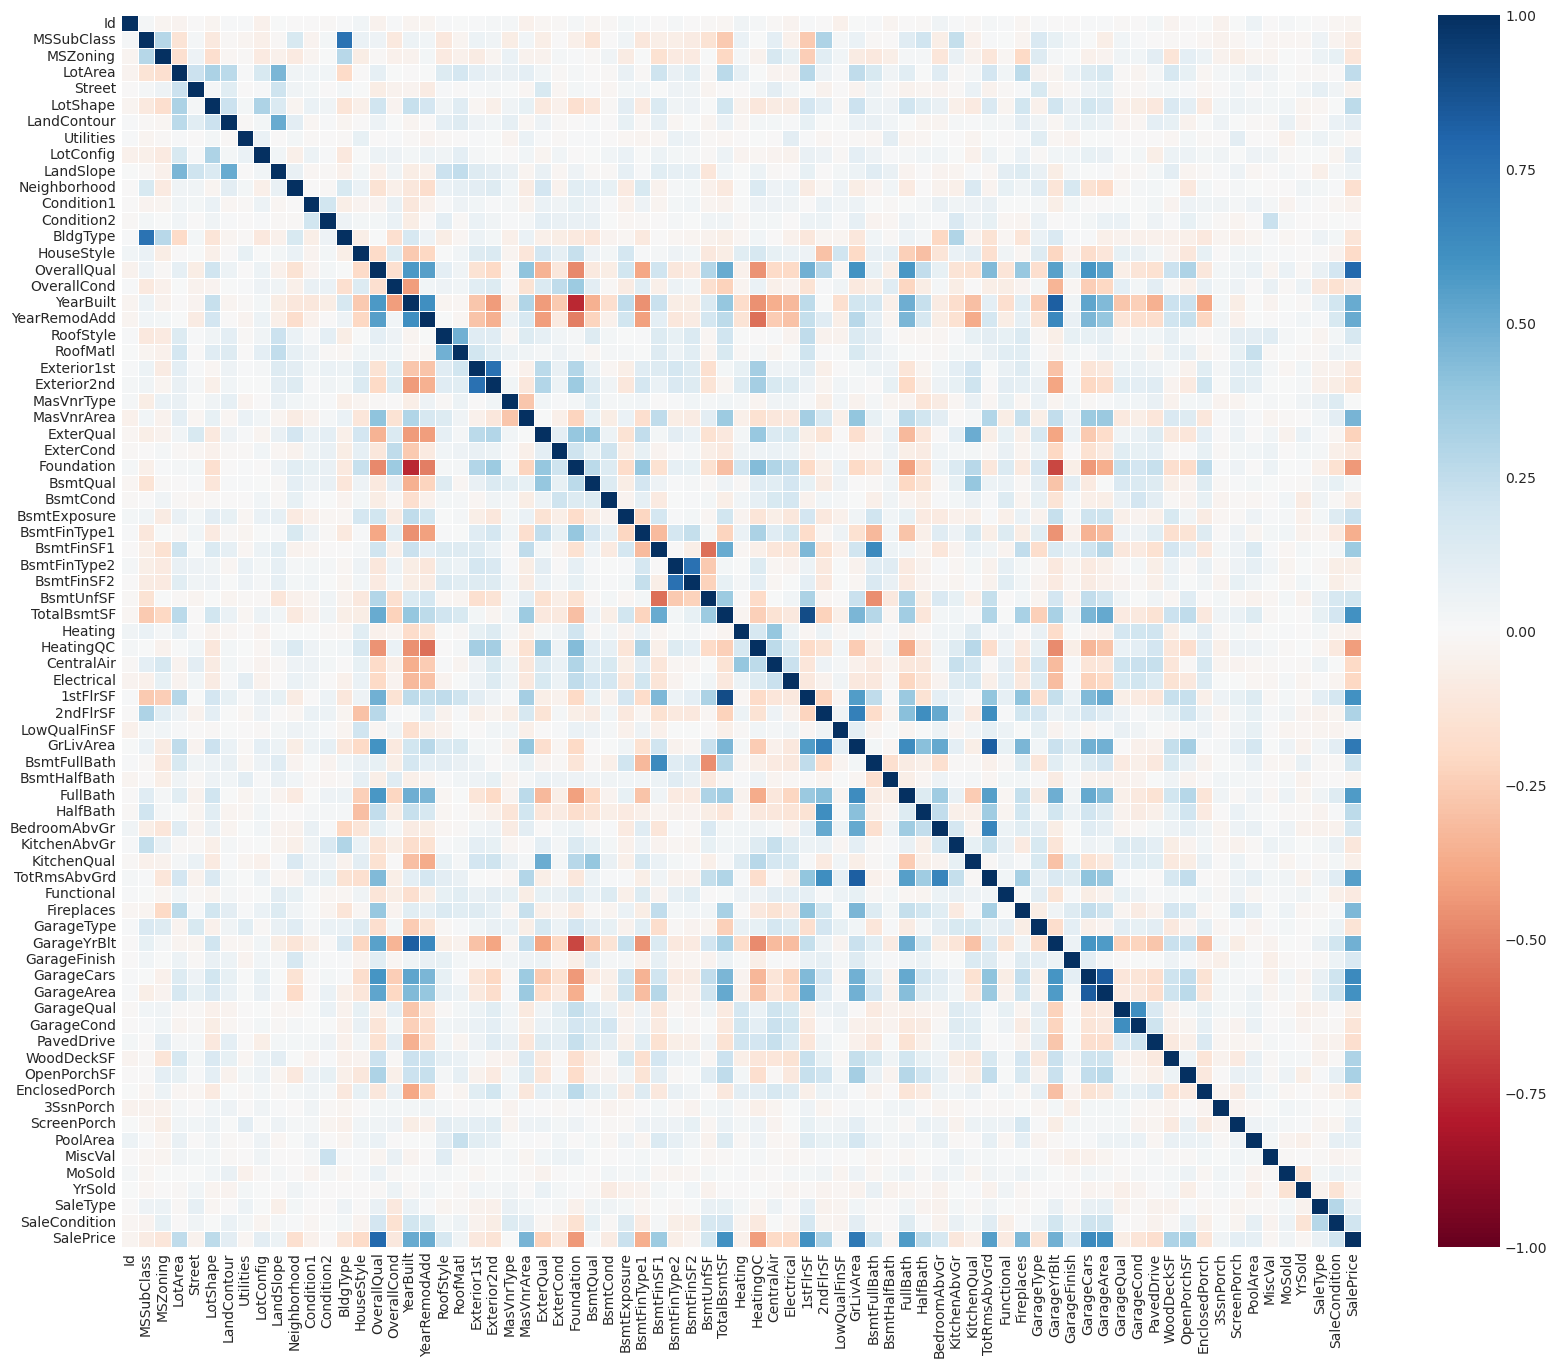

In [25]:
corre_heatmap(X)

# Test set

In [26]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [27]:
#making filt data where if missing sum is >20, the column is droppped.

def filter_na(df):
    df_na_sum = df.isna().sum()
    for column, count in df_na_sum.items():
        if count > 20:
            df = df.drop(columns=[column])
        else:
            continue
    return df

In [28]:
df_test_filt_test = filter_na(df_test)
df_test_filt_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,1224.0,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,2.0,576.0,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,337.0,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal
1458,2919,60,RL,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,758.0,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,3.0,650.0,Y,190,48,0,0,0,0,0,11,2006,WD,Normal


In [29]:
nan_counts = df_test_filt_test.isna().sum()

pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0


In [ ]:
def fillin_small(df):
    for i in df_test_filt_test.columns:
        if i.dtype is 'object':
            count = i.nunique()
            count = count.sort()
        
        elif i.dtype is 'int64' or 'float64':
            average = (i.sum() / i.shape[0])

In [30]:

df_test_filt = df_test.dropna(axis=1)

In [31]:
nan_counts = df_test_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64


In [32]:
if df_train_selected_test.columns.equals(df_train_selected.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The columns in the two DataFrames are different.")

NameError: name 'df_train_selected_test' is not defined

# Feature selection 

# df_train

Train a RandomForestReg and NeuralNet with...

Original feature selections.

Selected features.



## Removed features
'Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition'

In [33]:
def df_selected(df, filt):
    for i in filt:
        if i in df.columns:
            df = df.drop(i, axis=1)
        else:
            continue
    return df

In [34]:
exclude_train = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType',
     'BsmtCond', 
     'BsmtExposure',
     'BsmtFinSF1', 
     'BsmtFinType1',
     'BsmtFinType2', 
     'BsmtFullBath', 
     'BsmtQual', 
     'BsmtUnfSF', 
     'GarageArea',
     'GarageCars', 
     'GarageCond', 
     'GarageFinish', 
     'GarageQual', 
     'GarageType',
     'GarageYrBlt', 
     'KitchenQual', 
     'MasVnrArea', 
     'MasVnrType', 
     'TotalBsmtSF']

In [35]:
exclude_test = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType']

In [36]:
df_train_selected = df_selected(df_train_filt, exclude_train)

In [37]:
pd.set_option('display.max_columns', None) 
df_train_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice
0,60,7,5,2003,2003,Gd,TA,PConc,Ex,Y,SBrkr,856,854,1710,2,1,3,1,8,0,Y,0,61,208500
1,20,6,8,1976,1976,TA,TA,CBlock,Ex,Y,SBrkr,1262,0,1262,2,0,3,1,6,1,Y,298,0,181500
2,60,7,5,2001,2002,Gd,TA,PConc,Ex,Y,SBrkr,920,866,1786,2,1,3,1,6,1,Y,0,42,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,70,7,9,1941,2006,Ex,Gd,Stone,Ex,Y,SBrkr,1188,1152,2340,2,0,4,1,9,2,Y,0,60,266500
1458,20,5,6,1950,1996,TA,TA,CBlock,Gd,Y,FuseA,1078,0,1078,1,0,2,1,5,0,Y,366,0,142125
1459,20,5,6,1965,1965,Gd,TA,CBlock,Gd,Y,SBrkr,1256,0,1256,1,1,3,1,6,0,Y,736,68,147500


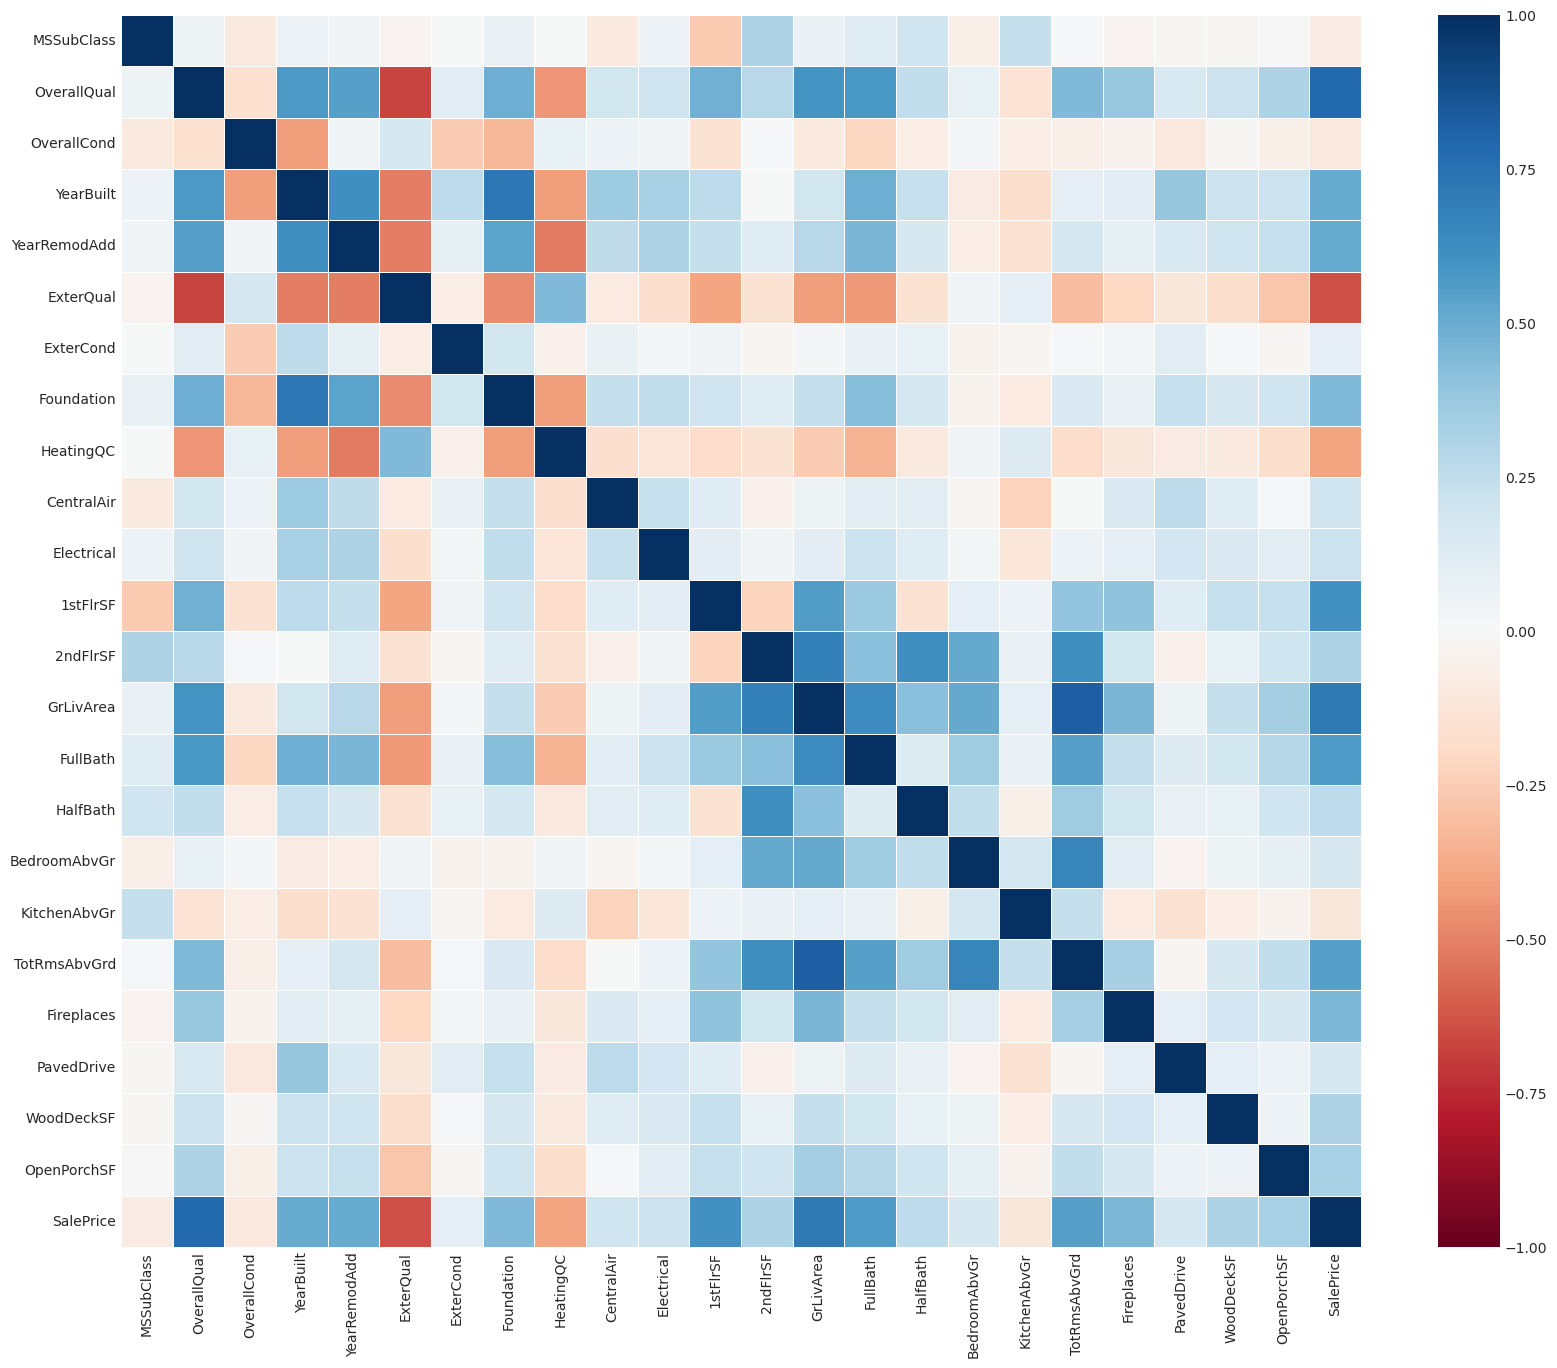

In [38]:
corre_heatmap(df_train_selected)

In [39]:
df_test_selected = df_selected(df_test_filt, exclude_test)
df_test_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF
0,20,5,6,1961,1961,TA,TA,CBlock,TA,Y,SBrkr,896,0,896,1,0,2,1,5,0,Y,140,0
1,20,6,6,1958,1958,TA,TA,CBlock,TA,Y,SBrkr,1329,0,1329,1,1,3,1,6,0,Y,393,36
2,60,5,5,1997,1998,TA,TA,PConc,Gd,Y,SBrkr,928,701,1629,2,1,3,1,6,1,Y,212,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,5,7,1960,1996,TA,TA,CBlock,Ex,Y,SBrkr,1224,0,1224,1,0,4,1,7,1,Y,474,0
1457,85,5,5,1992,1992,TA,TA,PConc,TA,Y,SBrkr,970,0,970,1,0,3,1,6,0,Y,80,32
1458,60,7,5,1993,1994,TA,TA,PConc,Ex,Y,SBrkr,996,1004,2000,2,1,3,1,9,1,Y,190,48


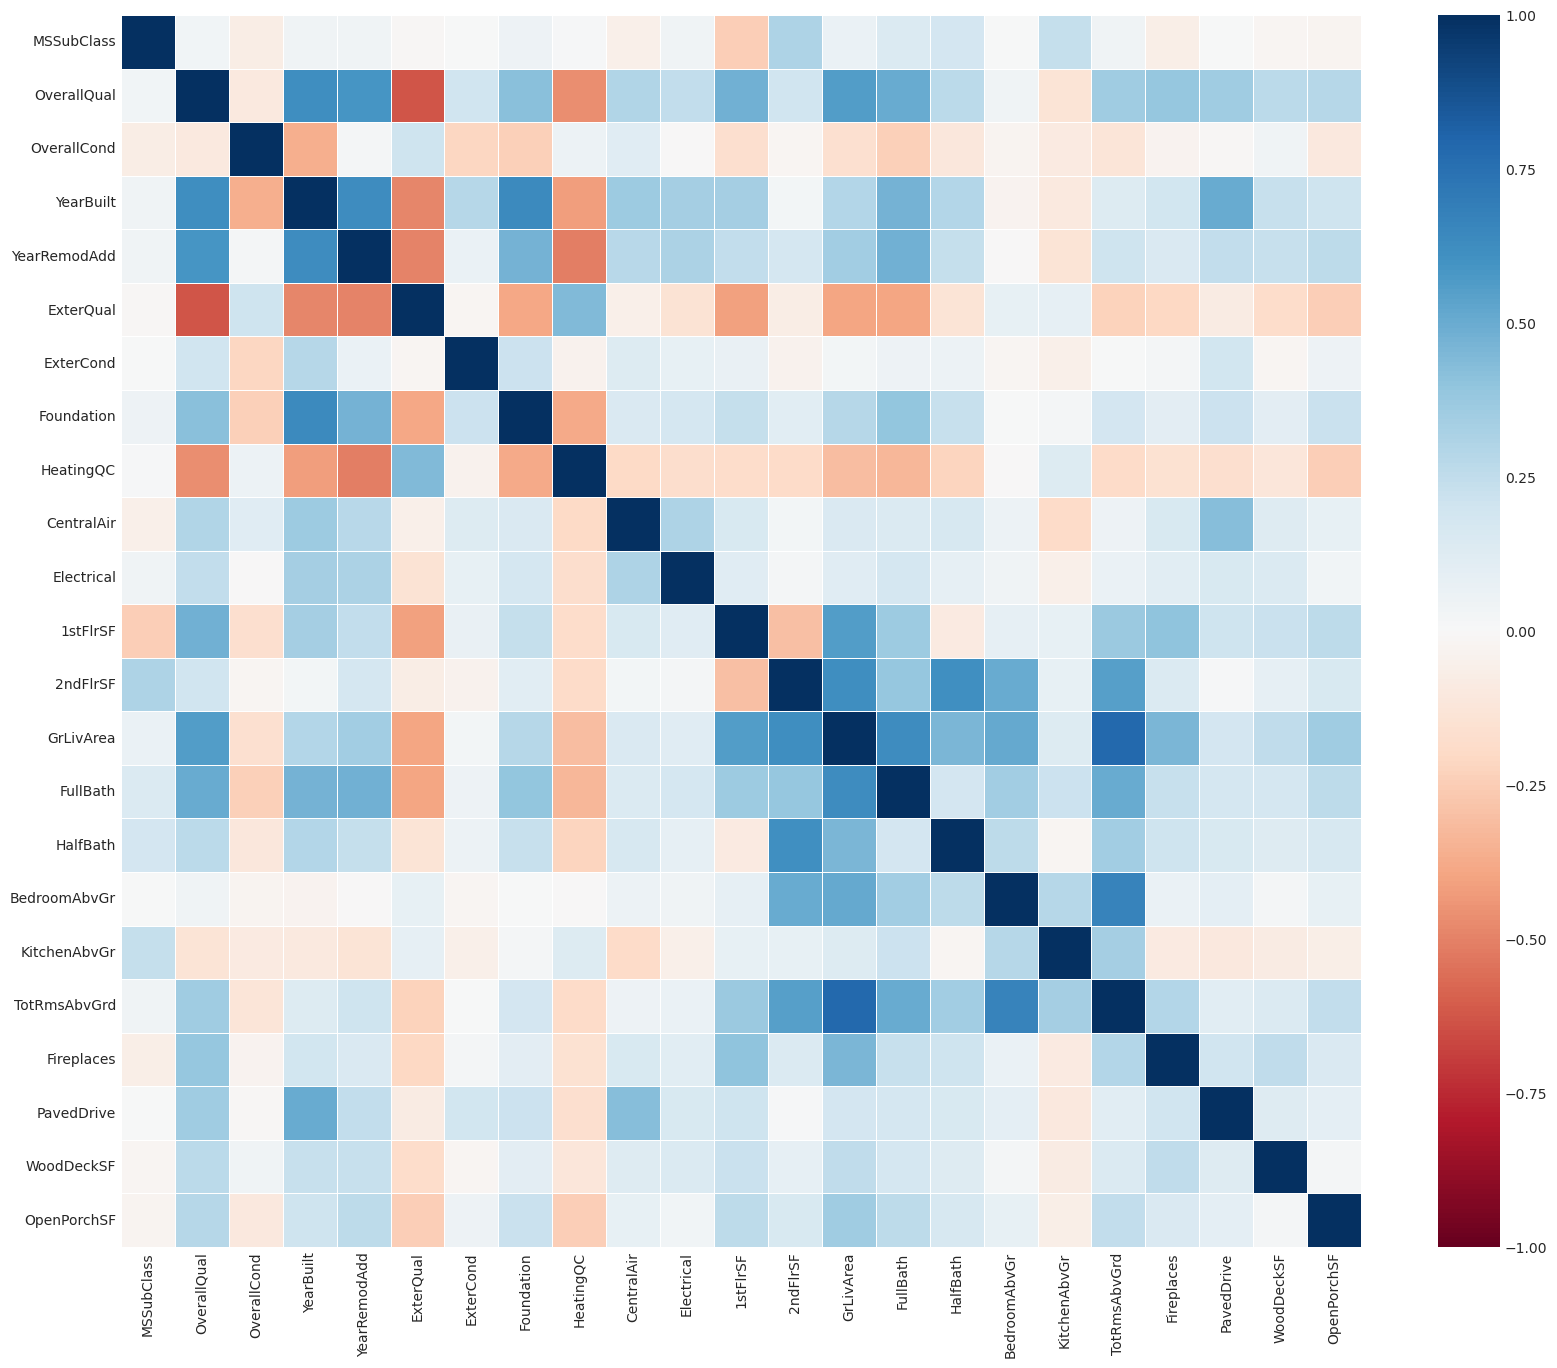

In [40]:
corre_heatmap(df_test_selected)

In [41]:
columns_only_in_df_train_selected = df_train_selected.columns.difference(df_test_selected.columns)
print("Columns only in df_train_selected:")
print(columns_only_in_df_train_selected)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_selected = df_test_selected.columns.difference(df_train_selected.columns)
print("\nColumns only in df_test_selected:")
print(columns_only_in_df_test_selected)

# Compare the common columns for differences
common_columns = df_train_selected.columns.intersection(df_test_selected.columns)

Columns only in df_train_selected:
Index(['SalePrice'], dtype='object')

Columns only in df_test_selected:
Index([], dtype='object')


In [42]:
df_train_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


In [43]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_y = df_train_selected['SalePrice']
train_X = df_train_selected.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=24)


'''
X_train = df_train_selected.drop(['SalePrice'], axis=1)
y_train = df_train_selected['SalePrice']


X_test = df_test_selected.drop(['SalePrice'], axis=1)
y_test = df_test_selected['SalePrice']
'''

"\nX_train = df_train_selected.drop(['SalePrice'], axis=1)\ny_train = df_train_selected['SalePrice']\n\n\nX_test = df_test_selected.drop(['SalePrice'], axis=1)\ny_test = df_test_selected['SalePrice']\n"

In [45]:
y_train

145    130000
556    141000
461    155000
        ...  
213    156000
982    159895
457    256000
Name: SalePrice, Length: 1070, dtype: int64

In [46]:
X_train

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF
145,160,6,5,2004,2006,2,3,2,0,1,4,970,739,1709,2,0,3,1,7,0,2,0,40
556,20,5,5,1957,1957,3,3,1,4,1,0,1092,0,1092,1,0,2,1,6,1,2,268,0
461,70,7,9,1936,2007,2,2,2,0,1,4,575,560,1135,1,0,3,1,6,0,2,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,20,5,5,1995,1995,3,3,2,0,1,4,990,0,990,1,0,3,1,5,0,2,224,0
982,20,7,5,2007,2007,2,3,2,0,1,4,1266,0,1266,2,0,2,1,6,1,2,100,16
457,20,4,6,1954,1994,3,3,1,0,1,4,1663,0,1663,1,0,2,1,6,2,2,224,137


In [47]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [48]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error on Test Set:", loss)

# Make predictions
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 0.4355 - val_loss: 0.1504
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2195 - val_loss: 0.1179
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1880 - val_loss: 0.1103
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1622 - val_loss: 0.1052
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1465 - val_loss: 0.1010
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1315 - val_loss: 0.1044
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1193 - val_loss: 0.1073
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1112 - val_loss: 0.0994
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0960 - val_loss: 0.1019
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 0.1014
Epoch 11

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [49]:
# Print some predictions and their actual values
for i in range(10):
    formatstring = (f"Predicted: {predictions[i]} | Actual: {y_test[i]}")
    print(formatstring)

Predicted: [387009.4] | Actual: [582933]
Predicted: [124960.695] | Actual: [148000]
Predicted: [195009.67] | Actual: [187500]
Predicted: [194495.05] | Actual: [175000]
Predicted: [175004.22] | Actual: [176000]
Predicted: [83833.164] | Actual: [95000]
Predicted: [219878.75] | Actual: [213500]
Predicted: [258798.56] | Actual: [233230]
Predicted: [182433.12] | Actual: [206900]
Predicted: [150578.22] | Actual: [139900]


In [54]:
predictions

array([[387009.4  ],
       [124960.695],
       [195009.67 ],
       [194495.05 ],
       [175004.22 ],
       [ 83833.164],
       [219878.75 ],
       [258798.56 ],
       [182433.12 ],
       [150578.22 ],
       [207068.77 ],
       [124791.76 ],
       [126797.37 ],
       [ 94202.82 ],
       [183098.42 ],
       [173407.02 ],
       [158056.14 ],
       [224139.36 ],
       [107358.984],
       [ 81297.07 ],
       [216452.19 ],
       [196265.83 ],
       [244524.38 ],
       [218066.62 ],
       [134429.42 ],
       [ 91919.81 ],
       [198324.2  ],
       [183260.6  ],
       [111420.38 ],
       [217982.78 ],
       [158432.62 ],
       [230381.36 ],
       [147157.3  ],
       [144277.17 ],
       [146226.56 ],
       [157183.42 ],
       [153776.08 ],
       [148846.5  ],
       [118408.9  ],
       [137620.31 ],
       [184434.78 ],
       [209926.6  ],
       [157408.8  ],
       [181411.58 ],
       [135584.58 ],
       [305143.6  ],
       [200723.34 ],
       [10287

In [55]:
y_test

array([[582933],
       [148000],
       [187500],
       [175000],
       [176000],
       [ 95000],
       [213500],
       [233230],
       [206900],
       [139900],
       [175000],
       [ 94750],
       [123000],
       [ 86000],
       [189000],
       [145000],
       [140000],
       [213250],
       [103600],
       [ 95000],
       [224900],
       [191000],
       [268000],
       [189000],
       [124000],
       [100000],
       [213000],
       [198900],
       [111000],
       [201800],
       [151000],
       [250000],
       [144000],
       [155000],
       [143750],
       [155000],
       [176000],
       [156500],
       [134800],
       [135000],
       [196000],
       [194500],
       [174000],
       [192140],
       [139000],
       [423000],
       [200000],
       [115000],
       [217000],
       [111250],
       [126000],
       [157000],
       [248900],
       [219500],
       [175000],
       [163000],
       [145000],
       [149900],
       [217500

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'predictions' are your model's predictions and 'y_test' are the actual values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1154615608.0041008
Root Mean Squared Error (RMSE): 33979.635195276904
Mean Absolute Error (MAE): 22947.514852495337
R-squared (R2): 0.837400745590769
